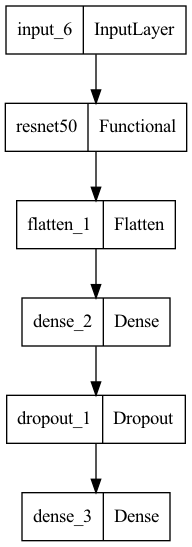

In [10]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import datasets, layers, models #Tensorflow에 있는 Keras 함수들 호출하기
import os
import tensorflow as tf

base_model = ResNet50(include_top=False, input_shape = (224, 224 ,3), weights = 'imagenet')

inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)

x = tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:])(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001),
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])

plot_model(model, to_file='model.png')

In [1]:
!pip install visualkeras

     |████████████████████████████████| 260 kB 6.5 MB/s eta 0:00:01
  Created wheel for aggdraw: filename=aggdraw-1.3.15-cp39-cp39-macosx_11_0_arm64.whl size=64754 sha256=20d94b7e28820eb03fdcf3921a7ec71b945adaa4d1d094a49295fb8fb41ce90e
  Stored in directory: /Users/jeonminjeong/Library/Caches/pip/wheels/48/5a/aa/3b799a3fd962e0ca82bf452ef57588d26ccff80574f332eed0
Successfully built aggdraw


In [9]:
import visualkeras

visualkeras.layered_view(model, legend=True) # without custom font
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model, legend=True, font=font) # selected font

OSError: cannot open resource

In [7]:
history = {}

history['loss'] = [50.649227142333984, 0.831024706363678, 0.7625709176063538, 0.6877292394638062, 0.6546511650085449, 0.5723602175712585, 0.5554120540618896, 0.5127042531967163, 0.44882088899612427, 0.4120733141899109, 0.3866075277328491]
history['accuracy'] = [0.46776261925697327, 0.639034628868103, 0.6754692792892456, 0.7124868631362915, 0.723388135433197, 0.7465314269065857, 0.7426256537437439, 0.759006679058075, 0.7812172174453735, 0.7951498031616211, 0.8045353889465332]
history['val_loss'] = [0.8673496246337891, 0.8112910389900208, 0.8195466995239258, 0.7656719088554382, 0.8002151250839233, 0.700291633605957, 0.7046827077865601, 0.6577333211898804, 0.7308896780014038, 0.7048047780990601, 0.7123353481292725]
history['val_accuracy'] = [0.6210213303565979, 0.6525008678436279, 0.6594963669776917, 0.6850297451019287, 0.6922000646591187, 0.713886022567749, 0.7107380628585815, 0.7014690637588501, 0.7236796021461487, 0.7095138430595398, 0.7194823622703552]

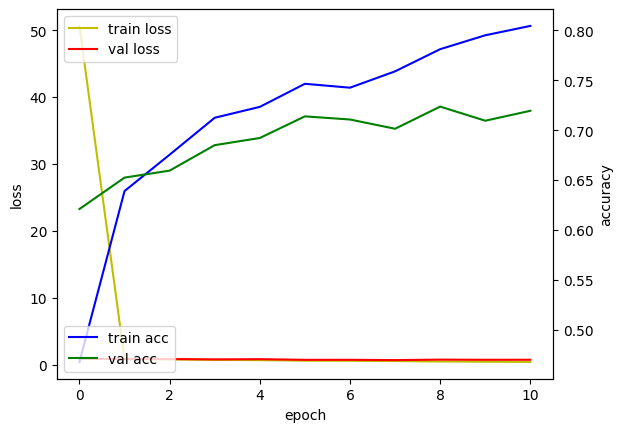

In [8]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history['loss'], 'y', label='train loss')
loss_ax.plot(history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history['accuracy'], 'b', label='train acc')
acc_ax.plot(history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()